In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
%matplotlib inline

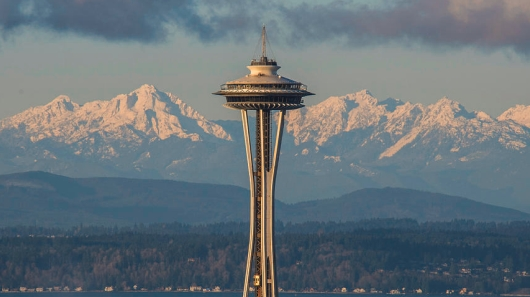

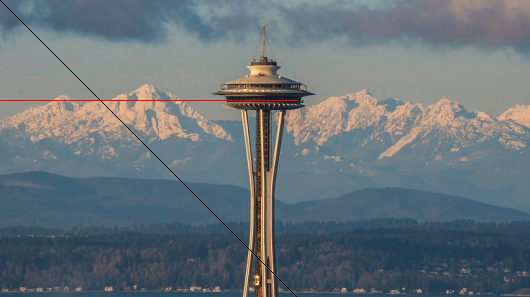

In [90]:
img = Image.open('seattle.jpg')
#plt.imshow(img)
display(img)
type(img)
# There are 2 ways obtain the pixel values in the image (read/write)
# 1. getpixel()/putpixel()
pt = 0, 0
img.getpixel(pt)
w, h = img.size
for x in range(h):
    img.putpixel((x, x), (0, 0, 0, 255))

# 2. using a PixelAccess obj to easy access []
imgpx = img.load() #Load image data based on sequence of data in a list [x,y]
imgpx[0, 0]
# you can also write the values to the image
for x in range(h):
    imgpx[x, 100] = (255, 0, 0)

display(img)


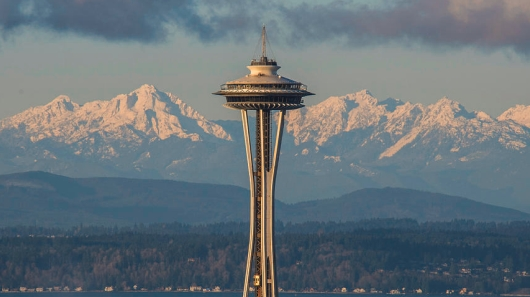

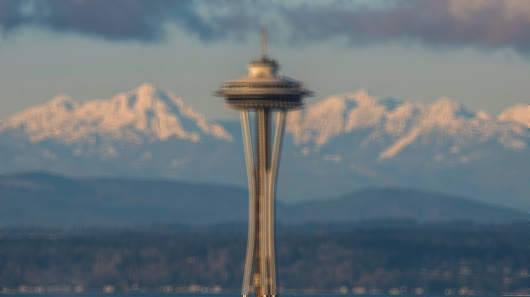

In [9]:
from IPython.display import display # to display multiple images
type(img)
imgb = img.filter(ImageFilter.BLUR)
display(img, imgb)

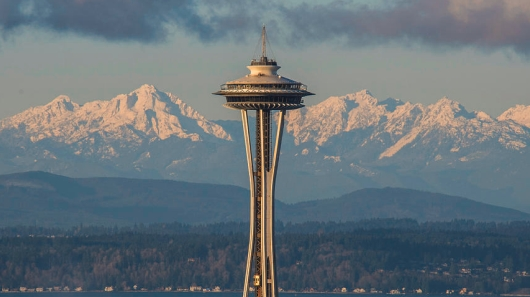

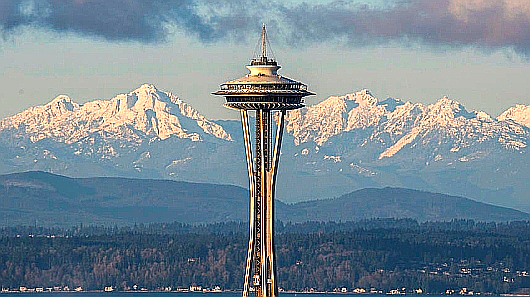

In [11]:
imgs = img.filter(ImageFilter.SHARPEN)
imgs = imgs.filter(ImageFilter.SHARPEN)
imgs = ImageEnhance.Contrast(imgs).enhance(1.2)
imgs = ImageEnhance.Brightness(imgs).enhance(1.2)
#plt.imshow(imgs)
display(img, imgs)

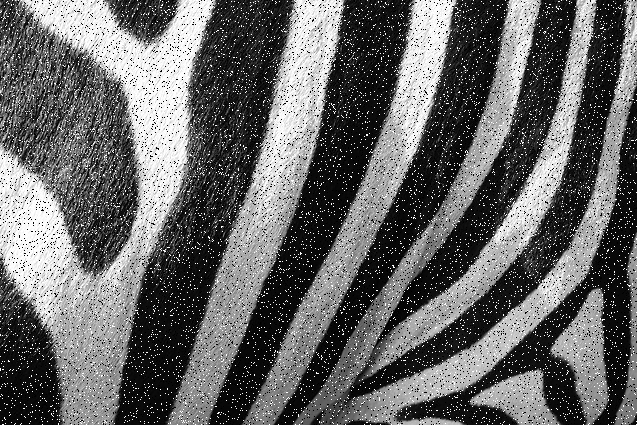

<Figure size 720x720 with 0 Axes>

In [12]:
img = Image.open('zebra.jpg')
#img = Image.open('fingerprint.jpg')
#img = Image.open('penguin.jpg')
plt.figure(figsize=(10,10))
#plt.imshow(img)
display(img)

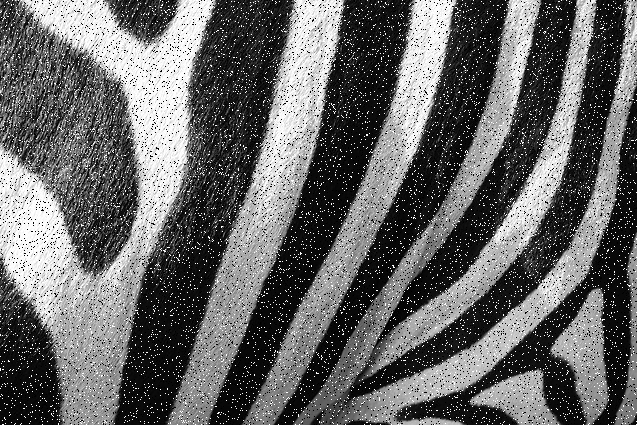

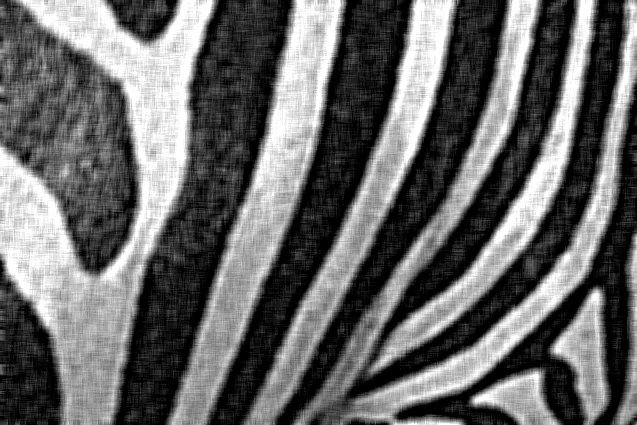

<Figure size 720x720 with 0 Axes>

In [13]:
# each pixel in the resulting image has a value equal to the average value of its 
# neighboring pixels in the input image. It is a form of low-pass ("blurring") 
# filter. A 3 by 3 box blur ("radius 1") can be written as matrix
imgb = img.filter(ImageFilter.BoxBlur(5)) # average smoothing
imgs = imgb.filter(ImageFilter.SHARPEN)
#imgs = imgs.filter(ImageFilter.SHARPEN)
# applies a Gaussian blur to a copy of the original image and then compares it 
# to the original. If the difference is greater than a user-specified threshold 
# setting, the images are (in effect) subtracted. (Radius, 
imgus = imgs.filter(ImageFilter.UnsharpMask(5.0, 255, 1))
plt.figure(figsize=(10,10))
#plt.imshow(imgus)
display(img, imgus)

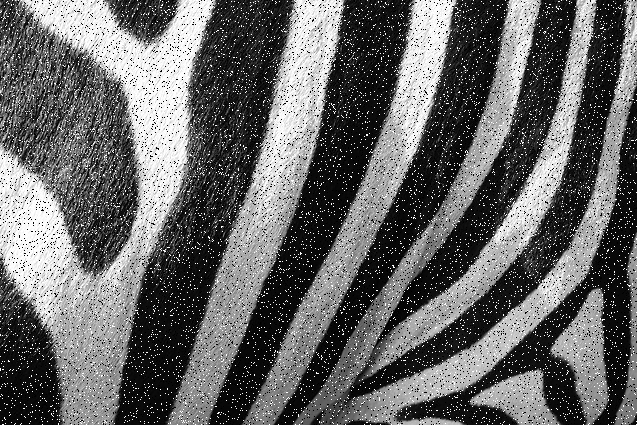

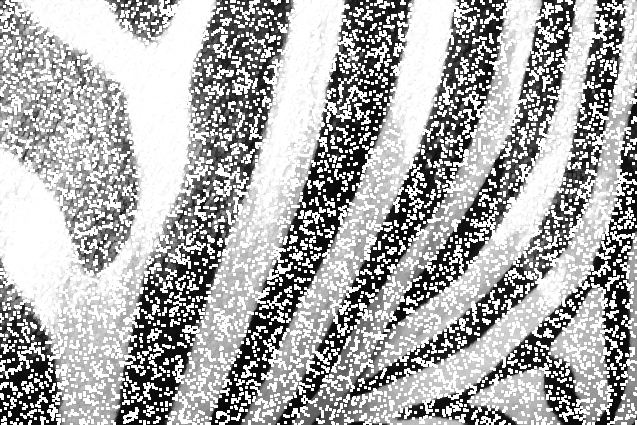

<Figure size 720x720 with 0 Axes>

In [18]:
# Let's try a min filter with radius = 3
# You will see the black spots that is because of the pepper noise
imgmin = img.filter(ImageFilter.MinFilter(3)) # location of pepper noise location MaxFilter location of salt noise
# Now if we try a max filter with radius = 3, 
# you will see the white spots that is because of the salt noise
#- imgmax = img.filter(ImageFilter.MaxFilter(3))
# How about if we try first MinFilter(n) followed by MaxFilter(n+2 or 4)
# so that the black spots get replaced by MaxFilter that include the black spots.
#- imgmax = imgmin.filter(ImageFilter.MaxFilter(7))
#- imgmin = imgmax.filter(ImageFilter.GaussianBlur(2)) # gaussian window
#- imgmin = imgmin.filter(ImageFilter.UnsharpMask(5.0, 255, 1))
#- imgb = ImageEnhance.Brightness(imgmin).enhance(0.9)
#- imgc = ImageEnhance.Contrast(imgb).enhance(0.9)

plt.figure(figsize=(10,10))
#plt.imshow(imgc)
display(img, imgmin)



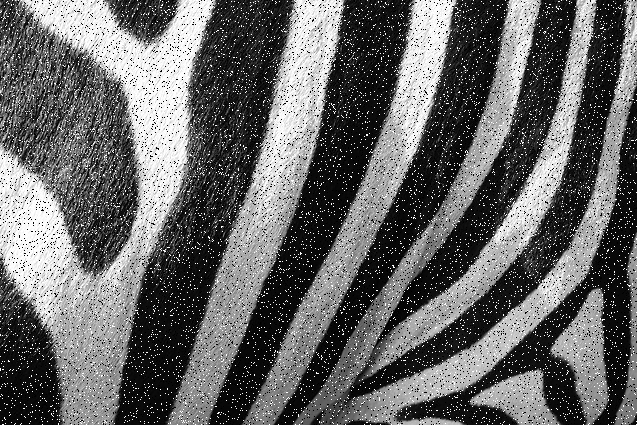

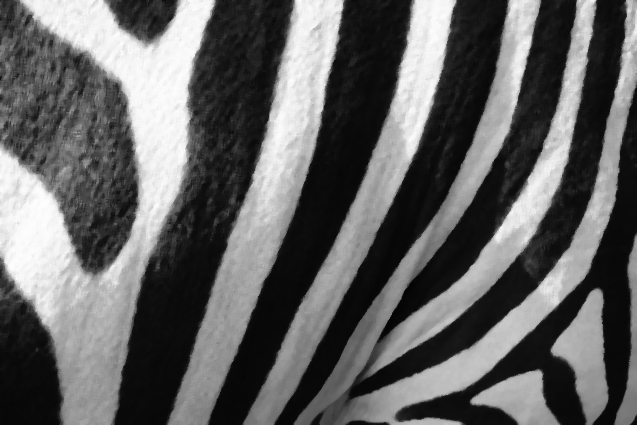

<Figure size 720x720 with 0 Axes>

In [21]:
# Sort the pixels, then pick the median value
imgm = img.filter(ImageFilter.MedianFilter(5))
plt.figure(figsize=(10,10))

# Since the image has gotten brighter, we can make the image less bright
# by calling ImageEnhance module.
# enhance(factor): Factor 1.0 always returns a copy of the original image, 
# lower factors mean less color (brightness, contrast, etc), and higher 
# values more. There are no restrictions on this value.
imgmin = imgmin.filter(ImageFilter.UnsharpMask(5.0, 255, 1))
imgme = ImageEnhance.Brightness(imgm).enhance(1)
imgc = ImageEnhance.Contrast(imgme).enhance(1)

#plt.imshow(imgc)
display(img, imgc)

174592

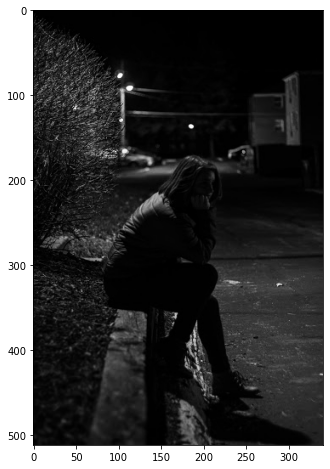

In [50]:
# In this image, you will see very dark image with very little contrast nor graylevels as
# most of pixels are stored in lower range. As the histogram shows, most of pixels are in 
# less than 50. (0=black, 256=white)
img = Image.open('lady.jpg')
# img = Image.open('input3.jpg')
# img = Image.open('input4.png')
# img = Image.open('eye.png')
plt.figure(figsize=(8,8))
plt.imshow(img)
x, y = img.size
x*y

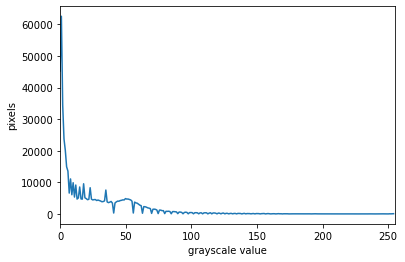

In [51]:
import numpy as np
def hist(in_img):
    # Let's create a histogram
    # The parameter bins determines the histogram size, or the number of “bins” to use for the histogram. 
    # We pass in 256 because we want to see # the pixel count for each of the 256 possible 
    # values in the grayscale image.

    histogram, bin_edges = np.histogram(in_img, bins=256, range=(0, 255))
    plt.xlabel("grayscale value")
    plt.ylabel("pixels")
    plt.xlim([0.0, 255.0])  # <- named arguments do not work here
    plt.plot(bin_edges[0:-1], histogram)
    plt.show()
hist(img)

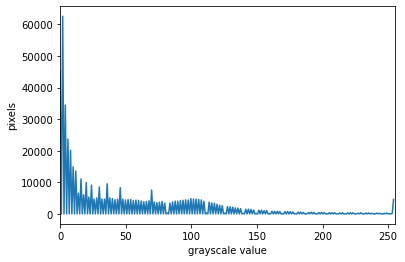

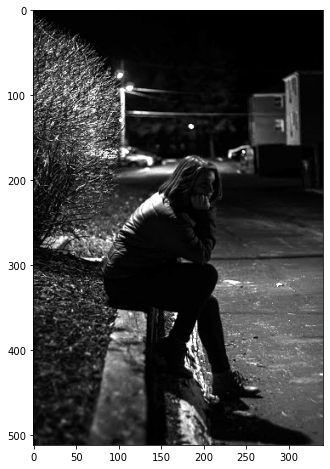

In [52]:
# image appears to be too dark.
imgb = ImageEnhance.Brightness(img).enhance(2)
# simplying brightening won't work since most of pixels are stored as black.
# so, let's try to make the image less contrast using the Contrast
hist(imgb)
plt.figure(figsize=(8,8))
plt.imshow(imgb)


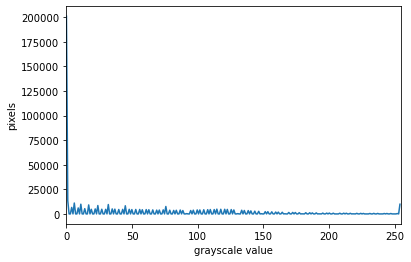

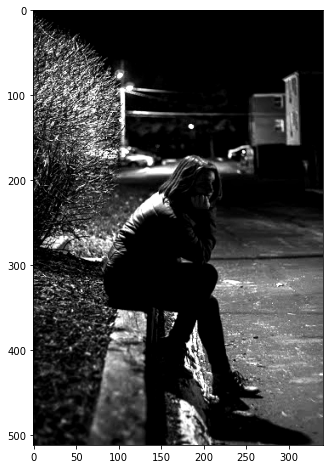

In [53]:
# image appears to be too dark.
imgc = ImageEnhance.Brightness(img).enhance(2)  # shifts around black to white.
# move the pixels to 2 directions, both whites and blacks.
imgc = ImageEnhance.Contrast(imgc).enhance(1.3) # changes the range of lowest and highest (Make |_<->_| shape of histogram)

# simplying brightening won't work since most of pixels are stored as black.
# so, let's try to make the image less contrast using the Contrast
hist(imgc)
plt.figure(figsize=(8,8))
plt.imshow(imgc)


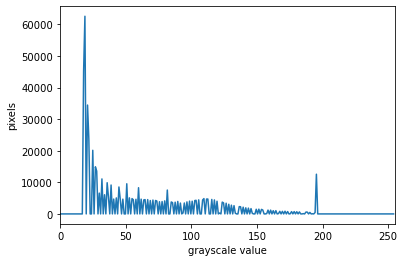

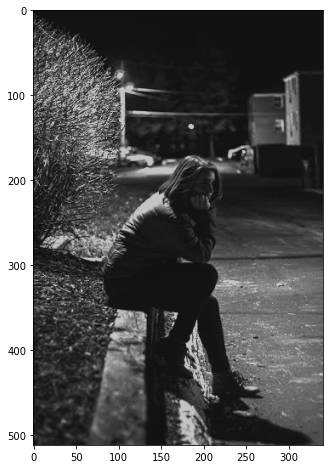

In [54]:
# Let's try ImageOps modules where they have 2 relevant processing methods, (1) autocontrast and (2) equalize
# (1) autocontrast(image, cutoff=0, ignore=None)
# Maximize (normalize) image contrast. This function calculates a histogram of the input image, removes 
# cutoff percent of the lightest and darkest pixels from the histogram, and remaps the image so that 
# the darkest pixel becomes black (0), and the lightest becomes white (255).
imgac = ImageOps.autocontrast(img, 1) # discarding pixels from the both ends
imgb = ImageEnhance.Brightness(imgac).enhance(1.3)
imgc = ImageEnhance.Contrast(imgb).enhance(0.7)
hist(imgc)
plt.figure(figsize=(8,8))
plt.imshow(imgc)


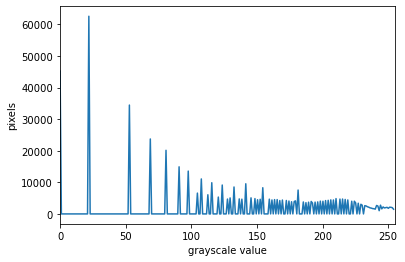

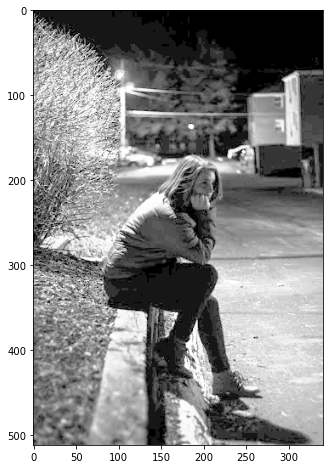

In [55]:
# Let's try ImageOps modules where they have 2 relevant processing methods, (1) autocontrast and (2) equalize
# (2) equalize(image, cutoff=0, ignore=None)
#img = Image.open('lady.jpg')
#img = Image.open('input4.png')
#img = Image.open('eye.png')

imgh = ImageOps.equalize(img)
#imgh = ImageOps.autocontrast(imgh, 10) # discarding pixels from the both ends
#imgh = ImageEnhance.Brightness(imgh).enhance(0.3)
#imgh = ImageEnhance.Contrast(imgh).enhance(1)
#imgh = imgh.filter(ImageFilter.MedianFilter(3))
#imgh = imgh.filter(ImageFilter.UnsharpMask(2.0, 32, 1))

hist(imgh)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.imshow(imgh)
#display(img, imgh)